In [1]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
class Smote(object):
    """
    SMOTE algorithm implementation.
    Parameters
    ----------
    samples : {array-like}, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    N : int, optional (default = 50)
        Parameter N, the percentage of n_samples, affects the amount of final 
        synthetic samples，which calculated by floor(N/100)*T.
    k : int, optional (default = 5)
        Specify the number for NearestNeighbors algorithms.
        knn参数
    r : int, optional (default = 2)
        Parameter for sklearn.neighbors.NearestNeighbors API.When r = 1, this 
        is equivalent to using manhattan_distance (l1), and euclidean_distance 
        (l2) for r = 2. For arbitrary p, minkowski_distance (l_r) is used.
    Examples
    --------
      >>> samples = np.array([[3,1,2], [4,3,3], [1,3,4],
                              [3,3,2], [2,2,1], [1,4,3]])
      >>> smote = Smote(N=200)
      >>> synthetic_points = smote.fit(samples)
      >>> print(synthetic_points)
      [[3.31266454 1.62532908 2.31266454]
       [2.4178394  1.5821606  2.5821606 ]
       [3.354422   2.677211   2.354422  ]
       [2.4169074  2.2084537  1.4169074 ]
       [1.86018171 2.13981829 3.13981829]
       [3.68440949 3.         3.10519684]
       [2.22247957 3.         2.77752043]
       [2.3339721  2.3339721  1.3339721 ]
       [3.31504371 2.65752185 2.31504371]
       [2.54247589 2.54247589 1.54247589]
       [1.33577795 3.83211103 2.83211103]
       [3.85206355 3.04931215 3.        ]]
    """
    def __init__(self, N=50, k=5, r=2):
        # 初始化self.N, self.k, self.r, self.newindex
        self.N = N
        self.k = k
        # self.r是距离决定因子
        self.r = r
        # self.newindex用于记录SMOTE算法已合成的样本个数
        self.newindex = 0
        
    # 构建训练函数
    def fit(self, samples):
        # 初始化self.samples, self.T, self.numattrs
        self.samples = samples
        # self.T是少数类样本个数，self.numattrs是少数类样本的特征个数
        self.T, self.numattrs = self.samples.shape

        # 查看N%是否小于100%
        if(self.N < 100):
            # 如果是，随机抽取N*T/100个样本，作为新的少数类样本
            np.random.shuffle(self.samples)
            self.T = int(self.N*self.T/100)
            self.samples = self.samples[0:self.T,:]
            # N%变成100%
            self.N = 100

        # 查看从T是否不大于近邻数k
        if(self.T <= self.k):
            # 若是，k更新为T-1
            self.k = self.T - 1

        # 令N是100的倍数
        N = int(self.N/100)
        # 创建保存合成样本的数组
        self.synthetic = np.zeros((self.T * N, self.numattrs))

        # 调用并设置k近邻函数
        neighbors = NearestNeighbors(n_neighbors=self.k+1, 
                                     algorithm='ball_tree', 
                                     p=self.r).fit(self.samples)

        # 对所有输入样本做循环
        for i in range(len(self.samples)):
            # 调用kneighbors方法搜索k近邻
            nnarray = neighbors.kneighbors(self.samples[i].reshape((1,-1)),
                                           return_distance=False)[0][1:]

            # 把N,i,nnarray输入样本合成函数self.__populate
            self.__populate(N, i, nnarray)

        # 最后返回合成样本self.synthetic
        return self.synthetic
    
    # 构建合成样本函数
    def __populate(self, N, i, nnarray):
        # 按照倍数N做循环
        for j in range(N):
            # attrs用于保存合成样本的特征
            attrs = []
            # 随机抽取1～k之间的一个整数，即选择k近邻中的一个样本用于合成数据
            nn = random.randint(0, self.k-1)
            
            # 计算差值
            diff = self.samples[nnarray[nn]] - self.samples[i]
            # 随机生成一个0～1之间的数
            gap = random.uniform(0,1)
            # 合成的新样本放入数组self.synthetic
            self.synthetic[self.newindex] = self.samples[i] + gap*diff

            # self.newindex加1， 表示已合成的样本又多了1个
            self.newindex += 1

数据加载

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
print('==> Preparing data..')
train_url = "E:\exercise_4\Kmeans/t_n_fequence_feature0328\SMOTE\s_n_2_fequence_feature_-label.csv" 
names = ['feature0','feature1','feature2','feature3','feature4','feature5',
'feature6','feature7','feature8','feature9','feature10','feature11',
'feature12','feature13','feature14','feature15',
'feature16','feature17','class'] 
train_dataset = pd.read_csv(train_url, names=names)
train_array = train_dataset.values
x_train = train_array[:,0:18]
y_train = train_array[:,18]

==> Preparing data..


In [5]:
samples = x_train

In [6]:
samples

array([[-4.03450000e-04, -3.90418700e-03,  2.85057090e-02,
         1.58312260e-02,  3.88122140e-02,  3.34012690e-02,
         2.15625279e-01,  3.22912998e+00,  1.09298236e+01,
         7.25277987e+00,  1.09319503e+01,  7.93914959e+00,
         8.88698065e+01,  6.60001033e+01,  1.39374807e+02,
         5.52051216e+04,  2.02213146e+00,  6.52614569e+00],
       [-1.88755800e-03, -1.75530010e-02, -5.81152530e-02,
        -5.83707890e-02, -7.87282280e-02, -9.46833940e-02,
        -1.30181803e+00,  2.81173634e-01,  1.11106767e+01,
         9.98467508e+00,  1.11866825e+01,  9.98863330e+00,
         9.66827735e+01,  8.83869474e+01,  7.21915371e+01,
         3.07336961e+04,  3.33881243e+00,  1.40028122e+01],
       [-6.06643000e-04, -3.24640200e-03,  4.18266130e-02,
         2.59792880e-02,  5.72315790e-02,  5.19953370e-02,
        -1.06257779e+00,  2.63994675e+00,  1.37821377e+01,
         8.56448170e+00,  1.38230384e+01,  8.96212394e+00,
         9.44086791e+01,  7.28684201e+01,  1.54650445e

In [7]:
smote = Smote(N=2000)
synthetic_points = smote.fit(samples)
print(synthetic_points)

[[-4.28554446e-04 -3.88954806e-03  2.79383611e-02 ...  5.52984004e+04
   2.01816116e+00  6.51145643e+00]
 [-8.37925631e-04 -7.89990502e-03  3.14724644e-03 ...  4.80410620e+04
   2.40759249e+00  8.71495498e+00]
 [-4.19702278e-04 -4.61179281e-03  4.34319602e-02 ...  5.65553942e+04
   1.96545496e+00  6.32031119e+00]
 ...
 [-1.05845800e-03 -1.03658444e-02  2.72728676e-03 ...  4.56740020e+04
   2.54748165e+00  9.60028869e+00]
 [-5.51228125e-04 -4.54466358e-03  5.03777134e-02 ...  5.72755618e+04
   1.93534111e+00  6.21204252e+00]
 [-4.99779118e-04 -4.68343161e-03  4.98716280e-02 ...  5.71920736e+04
   1.93879842e+00  6.22414813e+00]]


保存数据

In [8]:
s_n_2 = np.vstack((samples,synthetic_points))

In [9]:
np.savetxt('E:\exercise_4\Kmeans/t_n_fequence_feature0328\SMOTE/result/s_n_2_smote_fequence_feature.csv', s_n_2, delimiter = ',')

画图

In [10]:
from sklearn.manifold import TSNE 

#使用TSNE进行降维可视化操作 降为二维
tsne=TSNE(2) 
samples_plot =tsne.fit_transform(samples)
synthetic_points_plot =tsne.fit_transform(synthetic_points)

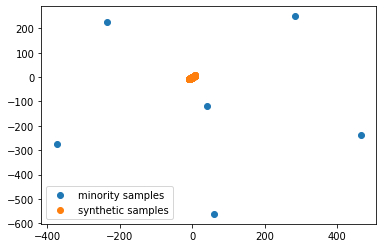

In [11]:
import matplotlib.pyplot as plt

plt.scatter(samples_plot[:,0], samples_plot[:,1])
plt.scatter(synthetic_points_plot[:,0], synthetic_points_plot[:,1])
plt.legend(["minority samples", "synthetic samples"])